# **Load Libraries**

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# **Load Dataset**

In [352]:
# Read the file using latin1 (ISO-8859-1) encoding instead of UTF-8
df = pd.read_csv("Corona_NLP_train.csv", encoding = "latin1")
print(df.shape)
df.head()

(41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [354]:
df["TweetAt"] = pd.to_datetime(df["TweetAt"])
df["TweetAt"] = df["TweetAt"].dt.strftime("%Y-%m-%d")
df["TweetAt"].dtype
df["TweetAt"].unique()

/var/folders/tv/kb31pg6x3tq_9pn1fdfzn63w0000gn/T/ipykernel_45581/1953570449.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["TweetAt"] = pd.to_datetime(df["TweetAt"])


array(['2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
       '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
       '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
       '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
       '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
       '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
       '2020-04-13', '2020-04-14'], dtype=object)

In [355]:
df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

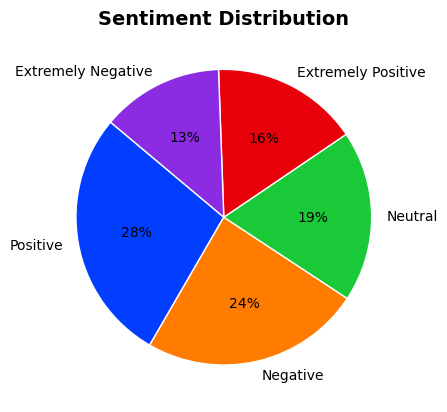

In [356]:
# Calculate the distribution of sentiment classes
sentiment_distribution = df["Sentiment"].value_counts()

colors = sns.color_palette("bright")

# Plot the sentiment distribution as a pie chart
plt.pie(sentiment_distribution,
        labels = sentiment_distribution.index,
        autopct = "%0.0f%%",
        colors = colors,
        startangle = 140,
        wedgeprops = {"edgecolor": "white"}
        )

plt.title("Sentiment Distribution", fontsize = 14, fontweight = "bold")

plt.show()

---

# **Clean and Preprocess Text**

In [357]:
import re
import html

In [358]:
tweets_sample = df["OriginalTweet"].sample(n = 10, random_state = 6)

n = 1

for tweet in tweets_sample:
    print(n, tweet,"\n")
    n += 1

1 To those who will inevitably whinge tomorrow about the supermarkets being closed... supermarket staff are doing an amazing job under difficult circumstances &amp; particularly deserve a day off away from virus worry #Covid19UK #StayHomeSaveLives #EasterSunday #clapforkeyworkers 

2 support your food service workers by tipping extra and signing this please https://t.co/zlcGilAASS 

3 AgeGuide has put together a resource page for older adults including special shopping hours for older adults and activities to do online to stay connected during this time! 

https://t.co/6VhuGLPI8m 

4 Gasoline prices are dropping, which is normally welcome news by drivers. But few can take advantage of the low prices as Âsocial distancingÂ and increasingly stringent COVID-19 prevention restrictions are keeping people off of the roads. 
https://t.co/Dbf7x09n5D https://t.co/Pma8Bh43ss 

5 .@JackBox Dear #JackInTheBox , your customer service has gone from bad to awful, especially at your #StudioCity loca

In [359]:
def clean_text(text):
    # Convert HTML entities (&amp -> &)
    text = html.unescape(text)

    # Lowercase 
    text = text.lower()

    # Remove URLs
    text = re.sub(r"https\S+", "", text)

    # Remove mentions
    text = re.sub(r"@\w+", "", text)

    # Remove hashtags with just the word
    text = re.sub(r"#", "", text)

    # Remove standalone 'amp' tokens left from HTML entities
    text = re.sub(r"\bamp\b", "", text)

    # Fix weird encoding characters
    text = text.encode("latin1").decode("utf-8", errors="ignore")

    # Protect decimals like 14.99
    text = re.sub(r"(\d+)\.(\d+)", r"\1deci\2", text)

    # Remove all punctuation except hyphens, $, apostrophes, and whitespace
    text = re.sub(r"[^a-z0-9$'\s]", "", text)

    # Restore decimals
    text = text.replace("deci", ".")
    
    # Remove multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [360]:
n = 1

for tweet in tweets_sample.map(clean_text):
    print(n, tweet,"\n")
    n += 1

1 to those who will inevitably whinge tomorrow about the supermarkets being closed supermarket staff are doing an amazing job under difficult circumstances particularly deserve a day off away from virus worry covid19uk stayhomesavelives eastersunday clapforkeyworkers 

2 support your food service workers by tipping extra and signing this please 

3 ageguide has put together a resource page for older adults including special shopping hours for older adults and activities to do online to stay connected during this time 

4 gasoline prices are dropping which is normally welcome news by drivers but few can take advantage of the low prices as social distancing and increasingly stringent covid19 prevention restrictions are keeping people off of the roads 

5 dear jackinthebox your customer service has gone from bad to awful especially at your studiocity location on laurel canyon youve raised your prices amid this covid2019 crisis get orders wrong mistreat your customers youre losing customer

In [361]:
df_train = df[["OriginalTweet", "Sentiment"]].reset_index(drop = True)
print(df_train.shape)
df_train.head()

(41157, 2)


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [362]:
df_train["OriginalTweet"] = df_train["OriginalTweet"].map(clean_text)
df_train.head()

,OriginalTweet,Sentiment
0,and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the covid...,Extremely Negative


In [363]:
df_train["Sentiment"] = "__label__" + df_train["Sentiment"].str.replace(" ", "_")
df_train.head()

,OriginalTweet,Sentiment
0,and and,__label__Neutral
1,advice talk to your neighbours family to excha...,__label__Positive
2,coronavirus australia woolworths to give elder...,__label__Positive
3,my food stock is not the only one which is emp...,__label__Positive
4,me ready to go at supermarket during the covid...,__label__Extremely_Negative


In [365]:
df_train["Sentiment_OriginalTweet"] = df_train["Sentiment"] + " " + df_train["OriginalTweet"]
df_train.head()

,OriginalTweet,Sentiment,Sentiment_OriginalTweet
0,and and,__label__Neutral,__label__Neutral and and
1,advice talk to your neighbours family to excha...,__label__Positive,__label__Positive advice talk to your neighbou...
2,coronavirus australia woolworths to give elder...,__label__Positive,__label__Positive coronavirus australia woolwo...
3,my food stock is not the only one which is emp...,__label__Positive,__label__Positive my food stock is not the onl...
4,me ready to go at supermarket during the covid...,__label__Extremely_Negative,__label__Extremely_Negative me ready to go at ...


In [366]:
df_train.to_csv("corona_tweets_train", columns = ["Sentiment_OriginalTweet"], index = False, header = False)

---

# **Training Model**

In [367]:
import fasttext

In [368]:
model = fasttext.train_supervised(input = "corona_tweets_train")
model.test("corona_tweets_train")

Read 1M words
Number of words:  52804
Number of labels: 5
Progress: 100.0% words/sec/thread: 2893701 lr:  0.000000 avg.loss:  0.988880 ETA:   0h 0m 0s 0.988880 ETA:   0h 0m 0s


(41157, 0.7713633160823189, 0.7713633160823189)

---

# **Predict the Test**

In [369]:
df_test = pd.read_csv("Corona_NLP_test.csv", encoding = "latin1")
print(df_test.shape)
df_test.head()

(3798, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [370]:
df_test = df_test[["OriginalTweet", "Sentiment"]].reset_index(drop = True)
print(df_test.shape)
df_test.head()

(3798, 2)


,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [371]:
df_test["OriginalTweet"] = df_test["OriginalTweet"].map(clean_text)
df_test.head()

,OriginalTweet,Sentiment
0,trending new yorkers encounter empty supermark...,Extremely Negative
1,when i couldn't find hand sanitizer at fred me...,Positive
2,find out how you can protect yourself and love...,Extremely Positive
3,panic buying hits newyork city as anxious shop...,Negative
4,toiletpaper dunnypaper coronavirus coronavirus...,Neutral


In [372]:
df_test["Sentiment"] = "__label__" + df_test["Sentiment"].str.replace(" ", "_")
df_test.head()

,OriginalTweet,Sentiment
0,trending new yorkers encounter empty supermark...,__label__Extremely_Negative
1,when i couldn't find hand sanitizer at fred me...,__label__Positive
2,find out how you can protect yourself and love...,__label__Extremely_Positive
3,panic buying hits newyork city as anxious shop...,__label__Negative
4,toiletpaper dunnypaper coronavirus coronavirus...,__label__Neutral


In [373]:
df_test["Sentiment_OriginalTweet"] = df_test["Sentiment"] + " " + df_test["OriginalTweet"]
df_test.head()

,OriginalTweet,Sentiment,Sentiment_OriginalTweet
0,trending new yorkers encounter empty supermark...,__label__Extremely_Negative,__label__Extremely_Negative trending new yorke...
1,when i couldn't find hand sanitizer at fred me...,__label__Positive,__label__Positive when i couldn't find hand sa...
2,find out how you can protect yourself and love...,__label__Extremely_Positive,__label__Extremely_Positive find out how you c...
3,panic buying hits newyork city as anxious shop...,__label__Negative,__label__Negative panic buying hits newyork ci...
4,toiletpaper dunnypaper coronavirus coronavirus...,__label__Neutral,__label__Neutral toiletpaper dunnypaper corona...


In [374]:
df_test.to_csv("corona_tweets_test", columns = ["Sentiment_OriginalTweet"], index = False, header = False)

In [375]:
model.test("corona_tweets_test")

(3798, 0.643233280674039, 0.643233280674039)

---

In [ ]:
def top_words(model, label, n):
    labels = model.get_labels()
    label_index = labels.index(label)

    output_matrix = model.get_output_matrix()   # label embeddings
    input_matrix = model.get_input_matrix()     # word embeddings
    words = model.get_words()
    label_vec = output_matrix[label_index]
    
    scores = []
    for i, w in enumerate(words):
        word_vec = input_matrix[i]
        score = np.dot(word_vec, label_vec)
        scores.append((w, score))
    scores.sort(key = lambda x: x[1], reverse = True) # sort by score (index 1)

    return scores[:n]

In [ ]:
labels = model.get_labels()

for label in labels:
    print(f"\nTop 20 Words for {label}:")
    for w, s in top_words(model, label, n = 20):
        print(f"{w} {s}")


Top 20 Words for __label__Positive:
hand 45.28319549560547
positive 42.611724853515625
free 39.221771240234375
best 37.79117202758789
won't 37.73979187011719
support 37.04313278198242
thanks 36.894081115722656
safe 36.4486083984375
confidence 36.415443420410156
interesting 36.324729919433594
relief 34.810020446777344
friend 34.07944107055664
special 33.99449920654297
like 33.896270751953125
care 33.29229736328125
heroes 33.05133056640625
good 32.48032760620117
great 32.005950927734375
thank 31.904855728149414
help 31.738096237182617

Top 20 Words for __label__Negative:
crisis 49.3348503112793
scams 42.17244338989258
fight 38.856441497802734
forced 35.24016571044922
kill 34.42810821533203
avoid 33.555179595947266
emergency 32.7969970703125
no 32.468788146972656
hell 32.402313232421875
shit 32.22901916503906
death 32.02276611328125
died 31.998435974121094
panic 31.82529067993164
fuck 30.540069580078125
war 30.223661422729492
stop 29.453853607177734
fears 29.423999786376953
sick 29.14144

In [400]:
def top_words_barplot(model, n_top_words):
    labels = model.get_labels()
    n_labels = len(labels)

    fig, axes = plt.subplots(n_labels, 1, figsize = (12, 4 * n_labels))

    for ax, label in zip(axes, labels):
        data = top_words(model, label, n = n_top_words)
        words = [word for word, score in data]
        scores = [score for word, score in data]

        words, scores = zip(*sorted(zip(words, scores), key = lambda x: x[1], reverse = True))

        ax.barh(words, scores)
        ax.invert_yaxis()

        ax.set_title(f"Top {n_top_words} Words for {label}", fontsize = 12, weight = "bold")
        ax.set_xlabel("Influence Score")
    
    plt.tight_layout()
    plt.show()

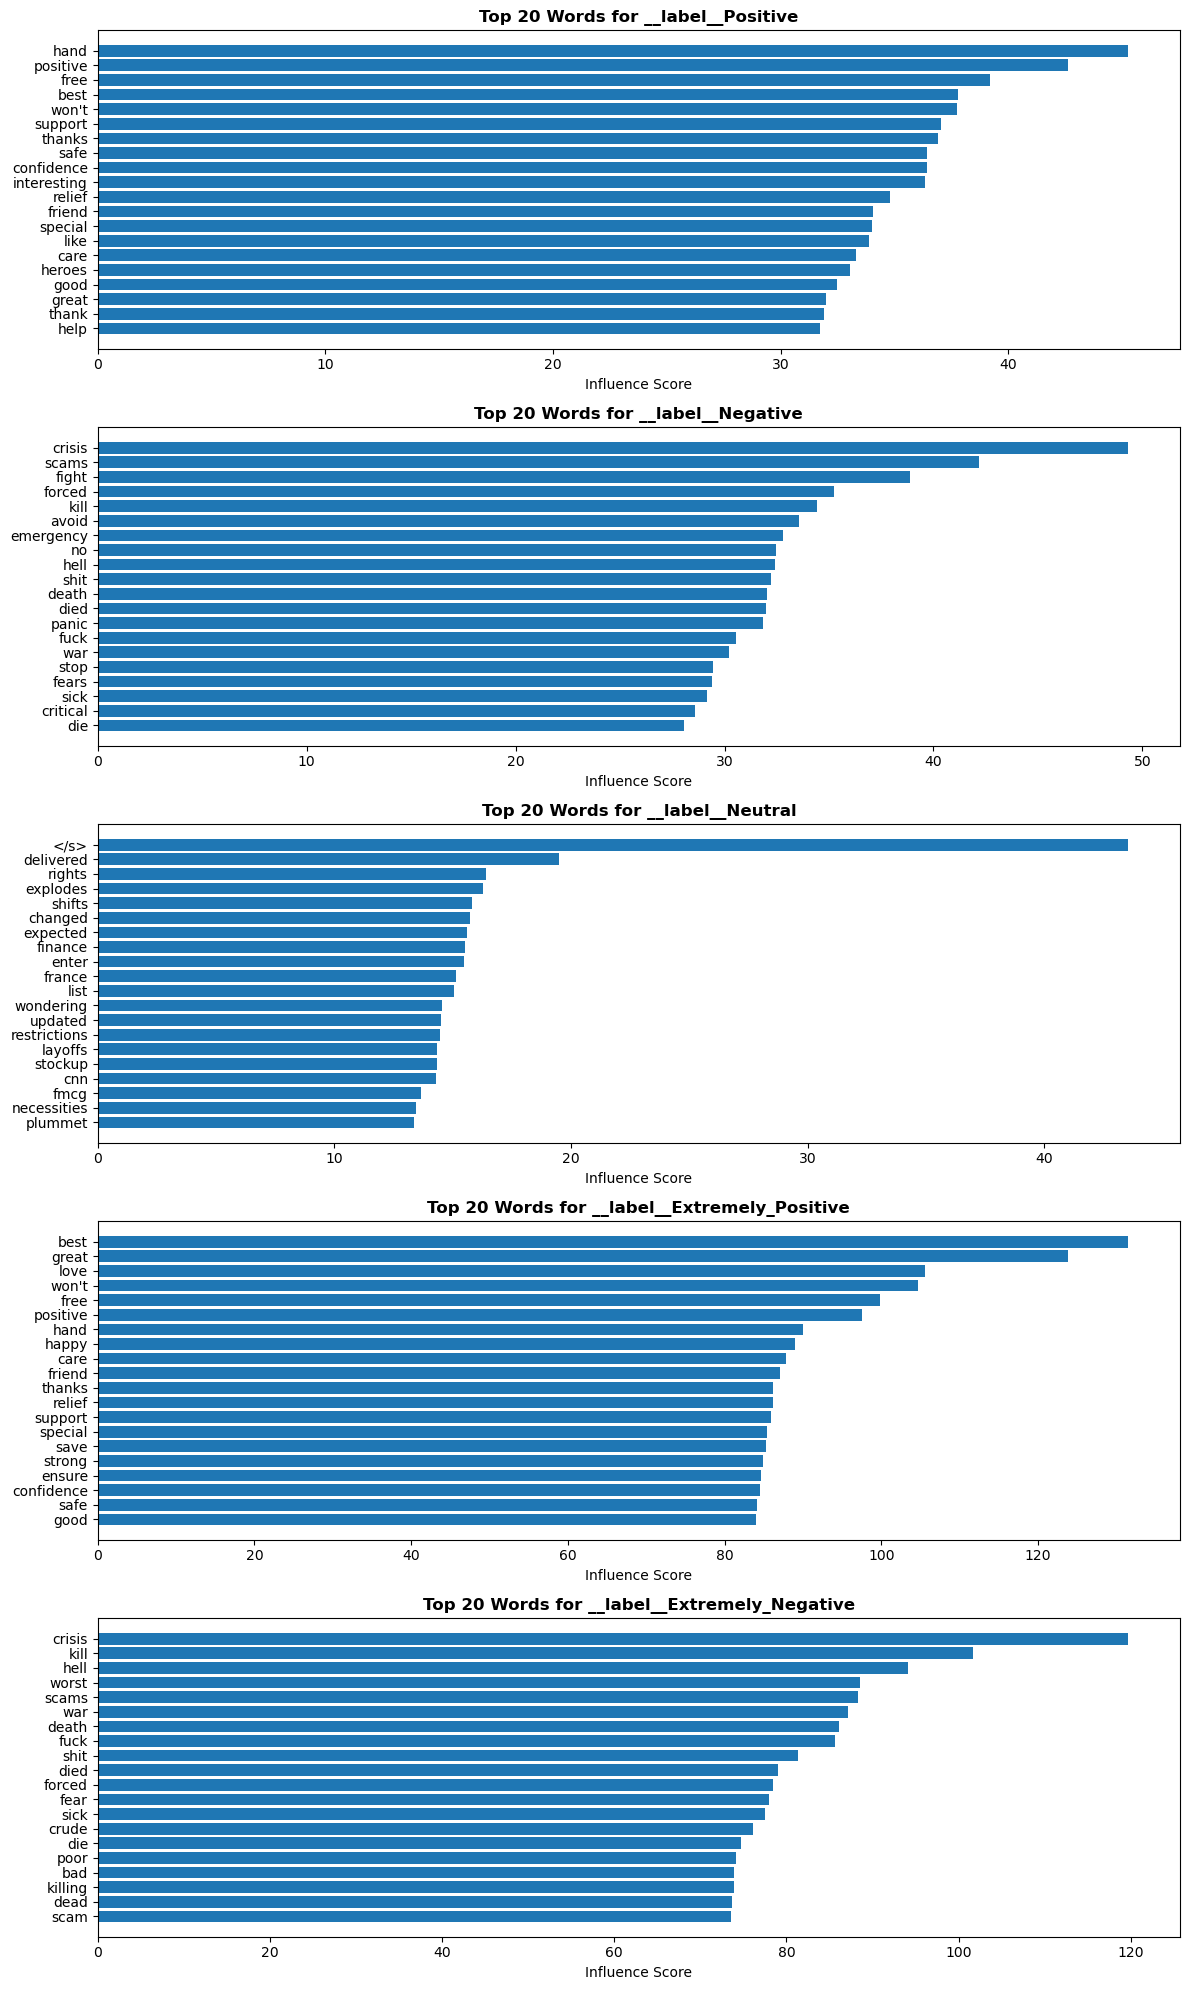

In [402]:
top_words_barplot(model, n_top_words = 20)